# Deconstructing the Fitbit Sleep Score

In this project I will use different Machine Learning models in order to get a better understanding of the Fitbit Sleep Score. For those people who have a Fitbit, you've probably been wondering how exactly Fitbit comes up with your sleep score. Sometimes you sleep for shorter periods of time with similar amounts of REM and deep sleep but still get a better sleep score. Other times you have rather low amounts of REM and deep sleep but a better score than a night of higher amounts of those. What's the secret behind this?
That's precisely what I will answer throughout this project.

In [ ]:
# Import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
# Read the data
url = 'https://raw.githubusercontent.com/srijp/Fitbit-Sleep-Score/master/Fitbit_Sleep_JB_041219_010720.csv'
sleep_data = pd.read_csv(url)

In [ ]:
sleep_data.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,overall_score
0,30/6/20 21:57,1/7/20 5:59,402,79,40,481,32,282,88,71.0
1,29/6/20 21:35,30/6/20 6:02,444,63,36,507,51,332,61,78.0
2,28/6/20 22:01,29/6/20 6:01,420,60,36,480,37,335,48,78.0
3,27/6/20 22:05,28/6/20 9:27,567,115,51,682,83,390,94,75.0
4,26/6/20 21:40,27/6/20 7:35,495,100,35,595,75,335,85,78.0


In [ ]:
# Drop the last row as it doesn't have any sleep score data
sleep_data.dropna(subset=['overall_score'], inplace=True)

For now I will focus on the columns from Minutes Asleep to Minutes Deep Sleep as the features and the overall_score as the label as that most closely resembles the data that the Fitbit App provides to its users. The Number of Awakenings column seems interesting but isn't provided in the app either so I'll drop that one for now as well.

In [ ]:
# Obtain column names for features
feats = sleep_data.columns[2:9]

X = sleep_data[feats].astype(float)
X.drop('Number of Awakenings', axis=1, inplace=True)
y = sleep_data['overall_score']

In [ ]:
# Split data into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()
#X_valid.head()
#y_train.head()
#y_valid.head()

,Minutes Asleep,Minutes Awake,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
150,481.0,92.0,573.0,100.0,316.0,65.0
96,430.0,108.0,538.0,31.0,295.0,104.0
199,403.0,75.0,478.0,70.0,262.0,71.0
68,399.0,119.0,518.0,43.0,284.0,72.0
156,487.0,83.0,570.0,93.0,298.0,96.0


In [ ]:
# Scale the feature data
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_valid)

array([[ 0.57525084,  0.17647059,  0.52225519,  0.36764706,  0.65517241,
         0.2247191 ],
       [ 0.42474916,  0.05882353,  0.35905045,  0.80147059,  0.14655172,
         0.38202247],
       [ 0.24749164,  0.27058824,  0.25519288,  0.27941176,  0.26724138,
         0.26966292],
       [ 0.79598662,  0.30588235,  0.75074184,  0.38970588,  0.83189655,
         0.47191011],
       [ 0.32441472,  0.44705882,  0.36795252,  0.23529412,  0.37068966,
         0.3258427 ],
       [ 0.69230769,  0.55294118,  0.72106825,  0.13970588,  0.6637931 ,
         0.94382022],
       [ 0.84615385,  0.51764706,  0.84866469,  0.52205882,  0.85344828,
         0.38202247],
       [ 0.14715719,  0.05882353,  0.11275964,  0.02941176,  0.36637931,
         0.05617978],
       [ 0.53511706,  0.27058824,  0.51038576,  0.41911765,  0.56034483,
         0.25842697],
       [ 0.05351171,  0.25882353,  0.08011869,  0.16911765,  0.06034483,
         0.3258427 ],
       [ 0.36120401,  0.38823529,  0.38575668,  0.

In [ ]:
# Create and fit the model
regressor = LinearRegression()
mlr = regressor.fit(X_train, y_train)

In [ ]:
# Make a prediction based on the model
y_predict = mlr.predict(X_valid)

Text(0.5, 1.0, 'Actual vs. predicted sleep score')

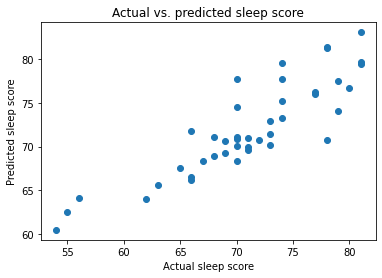

In [ ]:
# Plot the prediction against the actual labels
plt.scatter(y_valid, y_predict)
plt.xlabel('Actual sleep score')
plt.ylabel('Predicted sleep score')
plt.title('Actual vs. predicted sleep score')

In [ ]:
# Observe the test score
mlr.score(X_valid, y_valid)

0.7307151533039746

In [ ]:
# Inspect the statsmodel results
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     155.6
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           8.41e-61
Time:                        16:58:06   Log-Likelihood:                -522.64
No. Observations:                 209   AIC:                             1055.
Df Residuals:                     204   BIC:                             1072.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  45.7978      1.605     28.536      0.000      42.633      48.962
Minutes Asleep          0.0891      0.005     16.707      0.000       0.079       0.100
Minutes Awake          -0.1071      0.010    -11.095      0.000      -0.126      -0.088
Time in Bed            -0.0180      0.005     -3.596      0.000      -0.028      -0.008
Minutes REM Sleep       0.0637      0.009      7.471      0.000       0.047       0.080
Minutes Light Sleep     0.0045      0.006      0.810      0.419      -0.006       0.015
Minutes Deep Sleep      0.0209      0.010      2.159      0.032       0.002       0.040
==============================================================================
Omnibus:                        7.804   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.610
Skew:                          -0.450   Prob(JB):                       0.0223
Kurtosis:                       3.254   Cond. No.                     1.51e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.21e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# Test for collinearity!
X.corr()

,Minutes Asleep,Minutes Awake,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
Minutes Asleep,1.000000,0.425129,0.973082,0.540433,0.842955,0.309902
Minutes Awake,0.425129,1.000000,0.622283,-0.096565,0.478304,0.209863
Time in Bed,0.973082,0.622283,1.000000,0.442799,0.850803,0.321450
Minutes REM Sleep,0.540433,-0.096565,0.442799,1.000000,0.126178,0.176252
Minutes Light Sleep,0.842955,0.478304,0.850803,0.126178,1.000000,-0.093675
Minutes Deep Sleep,0.309902,0.209863,0.321450,0.176252,-0.093675,1.000000


In [ ]:
# Create list of columns to drop
drop = ['Time in Bed', 'Minutes Light Sleep']

In [ ]:
# Drop Time in Bed and Minutes Light Sleep from the DataFrame
X_reduced = X.drop(drop, axis=1)
X_reduced.corr()

,Minutes Asleep,Minutes Awake,Minutes REM Sleep,Minutes Deep Sleep
Minutes Asleep,1.000000,0.425129,0.540433,0.309902
Minutes Awake,0.425129,1.000000,-0.096565,0.209863
Minutes REM Sleep,0.540433,-0.096565,1.000000,0.176252
Minutes Deep Sleep,0.309902,0.209863,0.176252,1.000000


In [ ]:
# Inspect the statsmodel results
X2 = sm.add_constant(X_reduced)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     155.6
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           8.41e-61
Time:                        16:58:44   Log-Likelihood:                -522.64
No. Observations:                 209   AIC:                             1055.
Df Residuals:                     204   BIC:                             1072.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 45.7978      1.605     28.536      0.000      42.633      48.962
Minutes Asleep         0.0755      0.005     14.917      0.000       0.066       0.086
Minutes Awake         -0.1252      0.014     -8.672      0.000      -0.154      -0.097
Minutes REM Sleep      0.0592      0.012      4.940      0.000       0.036       0.083
Minutes Deep Sleep     0.0164      0.011      1.439      0.152      -0.006       0.039
==============================================================================
Omnibus:                        7.804   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.610
Skew:                          -0.450   Prob(JB):                       0.0223
Kurtosis:                       3.254   Cond. No.                     3.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Create and fit the model
regressor_reduced = LinearRegression()
mlr_reduced = regressor_reduced.fit(X_train.drop(drop, axis=1), y_train)

In [ ]:
# Score the model
mlr_reduced.score(X_valid.drop(drop, axis=1), y_valid)

0.7307151533039746

In [ ]:
# Drop Minutes Asleep, Minutes Light Sleep and Minutes Deep Sleep from the DataFrame
X.drop(['Minutes Asleep', 'Minutes Light Sleep', 'Minutes Deep Sleep'], axis=1, inplace=True)
X.corr()

,Minutes Awake,Time in Bed,Minutes REM Sleep
Minutes Awake,1.000000,0.622283,-0.096565
Time in Bed,0.622283,1.000000,0.442799
Minutes REM Sleep,-0.096565,0.442799,1.000000


In [ ]:
# Rerun the Multiple Linear Regression

# Split data into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_valid)

# Create and fit the model
regressor = LinearRegression()
mlr = regressor.fit(X_train, y_train)

In [ ]:
# Observe the test score
mlr.score(X_valid, y_valid)

0.7311749958454801

In [ ]:
# Inspect the statsmodel results
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     205.7
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.50e-61
Time:                        16:59:06   Log-Likelihood:                -523.70
No. Observations:                 209   AIC:                             1055.
Df Residuals:                     205   BIC:                             1069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                46.3079      1.569     29.507      0.000      43.214      49.402
Minutes Awake        -0.1997      0.018    -11.260      0.000      -0.235      -0.165
Time in Bed           0.0767      0.005     15.302      0.000       0.067       0.087
Minutes REM Sleep     0.0602      0.012      5.014      0.000       0.037       0.084
==============================================================================
Omnibus:                        7.610   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.445
Skew:                          -0.451   Prob(JB):                       0.0242
Kurtosis:                       3.202   Cond. No.                     4.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Define function for converting hours and minutes into minutes
def hours_to_mins(time):
    hour = time[0]
    mins = time[1]
    mins = mins + hour * 60
    return mins

In [ ]:
X_train.columns

Index(['Minutes Awake', 'Time in Bed', 'Minutes REM Sleep'], dtype='object')

In [ ]:
yesterday = [(1,20), (8,32), (1,3)]

In [ ]:
# Define function to transform input times
def get_input(times):
    transformed = []
    for time in times:
        transformed.append(hours_to_mins(time))
    transformed = np.array(transformed)
    transformed = transformed.reshape(1, -1)
    return transformed

In [ ]:
# Convert last nights sleep score
last_night = get_input(yesterday)
last_night

array([[ 80, 512,  63]])

In [ ]:
# Make a sleep score prediction (the actual sleep score was 77)
mlr.predict(last_night)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([73.59933386])